In [2]:
#importig the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
import pandasql as psql

In [3]:
#LOAD THE TRAIN(EMPLOYEE) DATA
Empdata=pd.read_csv(r"C:\Users\gowth\Downloads\emp\newdata\train.csv",header=0)
Empdata_bk=Empdata.copy()
Empdata.head(10)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,0,54,0


In [4]:
#READ THE TEST(EMPLOYEE) DATA
Empdata1=pd.read_csv(r"C:\Users\gowth\Downloads\emp\newdata\test.csv",header=0)
#LOAD THE DATA IN THE BACKUP FILE
Empdata_bk1=Empdata1.copy()
#TO READ THE FIRST 5 ROWS
Empdata1.head(10)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61
5,46232,Procurement,region_7,Bachelor's,m,sourcing,1,36,3.0,2,0,68
6,54542,Finance,region_2,Bachelor's,m,other,1,33,5.0,3,0,57
7,67269,Analytics,region_22,Bachelor's,m,sourcing,2,36,3.0,3,0,85
8,66174,Technology,region_7,Master's & above,m,other,1,51,4.0,11,0,75
9,76303,Technology,region_22,Bachelor's,m,sourcing,1,29,5.0,2,0,76


In [5]:
#DISPLAY INFORMATION
Empdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [6]:
#DISPLAY INFORMATION
Empdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  awards_won?           23490 non-null  int64  
 11  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 2.2+ MB


In [7]:
#DISPLAY SHAPE
Empdata.shape

(54808, 13)

In [8]:
#DISPLAY SHAPE

Empdata1.shape

(23490, 12)

In [9]:
#to check whether there is any missing values or not
Empdata.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [10]:
#to check whether there is any missing values or not
Empdata1.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
awards_won?                0
avg_training_score         0
dtype: int64

In [11]:
#to check whether there is any duplicates or not
Empdata.duplicated().any()


False

In [12]:
#to check whether there is any duplicates or not
Empdata1.duplicated().any()

False

In [13]:
Empdata.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [14]:
Empdata1.nunique()

employee_id             23490
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings             9
age                        41
previous_year_rating        5
length_of_service          34
awards_won?                 2
avg_training_score         61
dtype: int64

In [15]:
#using knn imputer to address the  missing values
#knn imputer(missing_values=np.nan,n_neighbours=5,weights='uniform',metric='non_eucledian',copy=True,add_Indicator=False)
from sklearn.impute import KNNImputer
#create an object
imputer_knn=KNNImputer(missing_values=np.nan)
#fill the missing values 
Empdata['previous_year_rating']=imputer_knn.fit_transform(Empdata[['previous_year_rating']])
#Empdata['previous_year_rating']=Empdata['previous_year_rating'].astype(int)

Empdata

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0


In [16]:
# Use SimpleImputer to address missing values

from sklearn.impute import SimpleImputer

imputer_str = SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=None, verbose=0,
                            copy=True, add_indicator=False)

Empdata['education'] = imputer_str.fit_transform(Empdata[['education']])
Empdata

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,45,0


In [17]:
Empdata.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [18]:
# use Labelencoder to handle catgorical data
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Empdata['department'] = LE.fit_transform(Empdata['department'])
Empdata['region'] = LE.fit_transform(Empdata['region'])
Empdata['education'] = LE.fit_transform(Empdata['education'])
Empdata['gender'] = LE.fit_transform(Empdata['gender'])
Empdata['recruitment_channel'] = LE.fit_transform(Empdata['recruitment_channel'])
Empdata

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,5,0,1,2,1,48,3.0,17,0,78,0
54804,74592,4,19,2,0,0,1,37,2.0,6,0,56,0
54805,13918,0,0,0,1,0,1,27,5.0,3,0,79,0
54806,13614,7,33,0,1,2,1,29,1.0,2,0,45,0


In [19]:
#using knn imputer to address the  missing values
#knn imputer(missing_values=np.nan,n_neighbours=5,weights='uniform',metric='non_eucledian',copy=True,add_Indicator=False)
from sklearn.impute import KNNImputer
#create an object
imputer_knn=KNNImputer(missing_values=np.nan)
#fill the missing values 
Empdata1['previous_year_rating']=imputer_knn.fit_transform(Empdata1[['previous_year_rating']])
#Empdata['previous_year_rating']=Empdata['previous_year_rating'].astype(int)

Empdata

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,5,0,1,2,1,48,3.0,17,0,78,0
54804,74592,4,19,2,0,0,1,37,2.0,6,0,56,0
54805,13918,0,0,0,1,0,1,27,5.0,3,0,79,0
54806,13614,7,33,0,1,2,1,29,1.0,2,0,45,0


In [20]:
# Use SimpleImputer to address missing values

from sklearn.impute import SimpleImputer

imputer_str = SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=None, verbose=0,
                            copy=True, add_indicator=False)

Empdata1['education'] = imputer_str.fit_transform(Empdata1[['education']])
Empdata

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,5,0,1,2,1,48,3.0,17,0,78,0
54804,74592,4,19,2,0,0,1,37,2.0,6,0,56,0
54805,13918,0,0,0,1,0,1,27,5.0,3,0,79,0
54806,13614,7,33,0,1,2,1,29,1.0,2,0,45,0


In [21]:
Empdata1.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
dtype: int64

In [22]:
# use Labelencoder to handle catgorical data
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Empdata1['department'] = LE.fit_transform(Empdata1['department'])
Empdata1['region'] = LE.fit_transform(Empdata1['region'])
Empdata1['education'] = LE.fit_transform(Empdata1['education'])
Empdata1['gender'] = LE.fit_transform(Empdata1['gender'])
Empdata1['recruitment_channel'] = LE.fit_transform(Empdata1['recruitment_channel'])
Empdata1

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,8,18,0,1,2,1,24,3.339146,1,0,77
1,74430,2,28,0,0,0,1,31,3.000000,5,0,51
2,72255,7,4,0,1,0,1,31,1.000000,4,0,47
3,38562,5,11,0,0,0,3,31,2.000000,9,0,65
4,64486,1,21,0,1,2,1,30,4.000000,7,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,3,11,1,1,2,1,24,3.000000,1,0,61
23486,25600,8,17,0,1,2,1,31,3.000000,7,0,74
23487,45409,2,7,0,0,2,1,26,4.000000,4,0,50
23488,1186,5,24,0,1,2,3,27,3.339146,1,0,70


In [23]:
#count the target or dependent variable by '0' & '1' and their proportion
#(>=10 : 1,then the dataset is imbalance data)
is_promoted_count=Empdata.is_promoted.value_counts()
print('class 0:',is_promoted_count[0])
print('class 1:',is_promoted_count[1])
print('proportions:',round(is_promoted_count[0]/is_promoted_count[1],2),':1')
print('Total  records:',len(Empdata))

class 0: 50140
class 1: 4668
proportions: 10.74 :1
Total  records: 54808


In [24]:
## Lets drop unuseful coloumns from the dataset
Empdata.drop(['employee_id','gender','region'], axis=1, inplace=True)

In [25]:
## Lets drop unuseful coloumns from the dataset
Empdata1.drop(['employee_id','gender','region'], axis=1, inplace=True)

In [26]:
Empdata

,department,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,7,2,2,1,35,5.0,8,0,49,0
1,4,0,0,1,30,5.0,4,0,60,0
2,7,0,2,1,34,3.0,7,0,50,0
3,7,0,0,2,39,1.0,10,0,50,0
4,8,0,0,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...
54803,8,0,2,1,48,3.0,17,0,78,0
54804,4,2,0,1,37,2.0,6,0,56,0
54805,0,0,0,1,27,5.0,3,0,79,0
54806,7,0,2,1,29,1.0,2,0,45,0


In [27]:
#IDENTIFY THE TARGET AND INDEPENDENT VARIABLES
indepVar=[]
for col in Empdata.columns:
    if col !='is_promoted':
        indepVar.append(col)
        
TargetVar='is_promoted'
x=Empdata[indepVar]
y=Empdata[TargetVar]

In [28]:
# Random oversampling can be implemented using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.125)

x_over, y_over = oversample.fit_resample(x, y)

print(x_over.shape)
print(y_over.shape)

(56407, 9)
(56407,)


In [29]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# Display the shape for train & test data

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((38365, 9), (16443, 9), (38365,), (16443,))

In [30]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train= mmscaler.fit_transform(x_train)
#x_train=mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)
#x_test=mmscaler.fit_tranform(x_test)
x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [31]:
x_train.head()

,0,1,2,3,4,5,6,7,8
0,1.000,0.0,0.0,0.111111,0.150,0.25,0.055556,0.0,0.633333
1,0.625,0.0,0.0,0.000000,0.175,0.75,0.083333,0.0,0.550000
2,0.125,0.0,0.0,0.222222,0.350,0.50,0.138889,0.0,0.283333
3,0.000,0.0,0.0,0.111111,0.500,1.00,0.222222,0.0,0.733333
4,0.625,0.0,0.0,0.000000,0.625,0.50,0.444444,0.0,0.483333


<Axes: ylabel='count'>

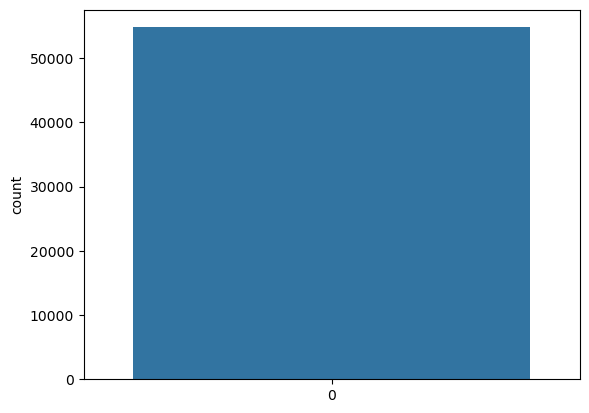

In [32]:
sns.countplot(Empdata.is_promoted)

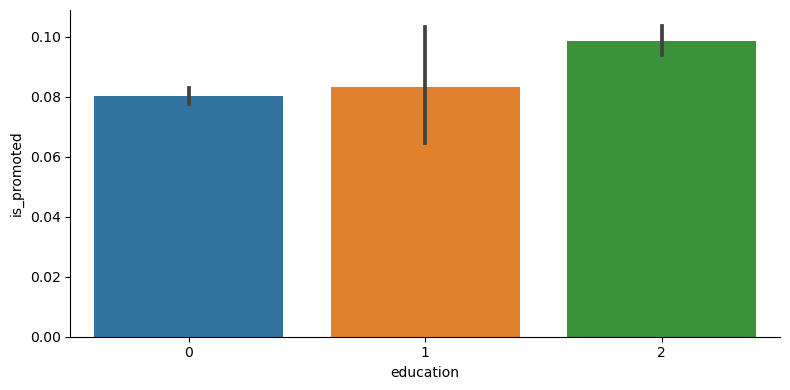

In [33]:
sns.catplot(x="education", y="is_promoted", kind="bar", data=Empdata, height=4, aspect=2)

In [34]:
#load the result dataset 
KNN_Results=pd.read_csv(r"C:\Users\gowth\Downloads\emp\KNN_Results.csv",header=0)
KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[  436   897]
 [  848 14262]]
Outcome values : 
 436 897 848 14262
Classification report : 
               precision    recall  f1-score   support

           1       0.34      0.33      0.33      1333
           0       0.94      0.94      0.94     15110

    accuracy                           0.89     16443
   macro avg       0.64      0.64      0.64     16443
weighted avg       0.89      0.89      0.89     16443

Accuracy : 89.4 %
Precision : 34.0 %
Recall : 32.7 %
F1 Score : 0.333
Specificity or True Negative Rate : 94.4 %
Balanced Accuracy : 63.6 %
MCC : 0.276
roc_auc_score: 0.635


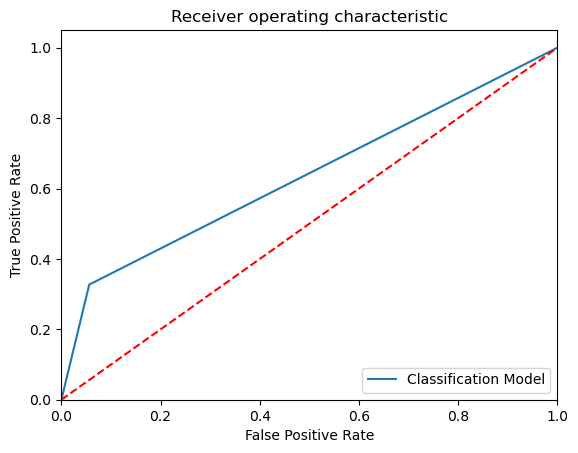

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[  274  1059]
 [   83 15027]]
Outcome values : 
 274 1059 83 15027
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.21      0.32      1333
           0       0.93      0.99      0.96     15110

    accuracy                           0.93     16443
   macro avg       0.85      0.60      0.64     16443
weighted avg       0.92      0.93      0.91     16443

Accuracy : 93.1 %
Precision : 76.8 %
Recall : 20.6 %
F1 Score : 0.324
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 60.0 %
MCC : 0.375
roc_auc_score: 0.6


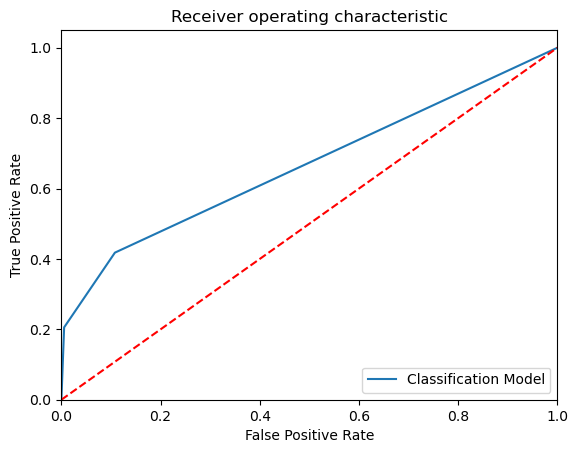

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[  339   994]
 [  231 14879]]
Outcome values : 
 339 994 231 14879
Classification report : 
               precision    recall  f1-score   support

           1       0.59      0.25      0.36      1333
           0       0.94      0.98      0.96     15110

    accuracy                           0.93     16443
   macro avg       0.77      0.62      0.66     16443
weighted avg       0.91      0.93      0.91     16443

Accuracy : 92.6 %
Precision : 59.5 %
Recall : 25.4 %
F1 Score : 0.356
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 61.9 %
MCC : 0.357
roc_auc_score: 0.62


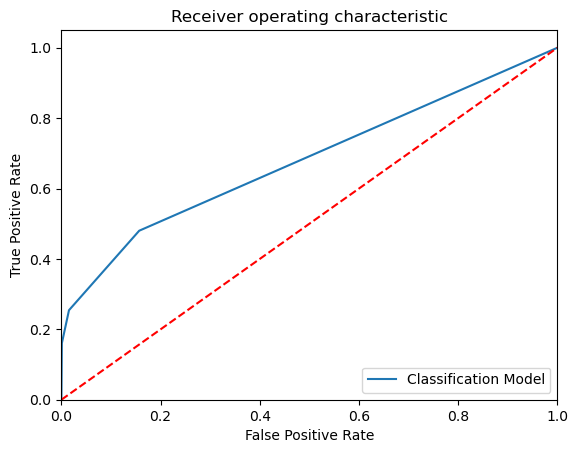

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[  272  1061]
 [   46 15064]]
Outcome values : 
 272 1061 46 15064
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.20      0.33      1333
           0       0.93      1.00      0.96     15110

    accuracy                           0.93     16443
   macro avg       0.89      0.60      0.65     16443
weighted avg       0.93      0.93      0.91     16443

Accuracy : 93.3 %
Precision : 85.5 %
Recall : 20.4 %
F1 Score : 0.329
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 60.0 %
MCC : 0.398
roc_auc_score: 0.601


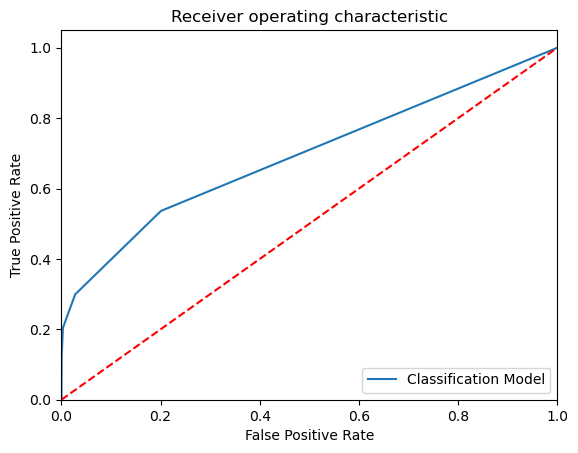

In [35]:
# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1,5, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------


In [36]:
KNN_Results

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,436,897,848,14262,0.894,0.340,0.327,0.333,0.944,0.276,0.635480,0.636
1,KNeighborsClassifier(n_neighbors=2),2,274,1059,83,15027,0.931,0.768,0.206,0.324,0.995,0.375,0.600029,0.600
2,KNeighborsClassifier(n_neighbors=3),3,339,994,231,14879,0.926,0.595,0.254,0.356,0.985,0.357,0.619513,0.619
3,KNeighborsClassifier(n_neighbors=4),4,272,1061,46,15064,0.933,0.855,0.204,0.329,0.997,0.398,0.600503,0.600


In [37]:
#load the result dataset 
EMResults=pd.read_csv(r"C:\Users\gowth\Downloads\emp\EMResults.csv",header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# SVM LINEAR KERNAL ALGORITHM

Model Name:  SVM - Linear
Confusion matrix : 
 [[    0  1333]
 [    0 15110]]
Outcome values : 
 0 1333 0 15110
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      1333
           0       0.92      1.00      0.96     15110

    accuracy                           0.92     16443
   macro avg       0.46      0.50      0.48     16443
weighted avg       0.84      0.92      0.88     16443

Accuracy : 91.9 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


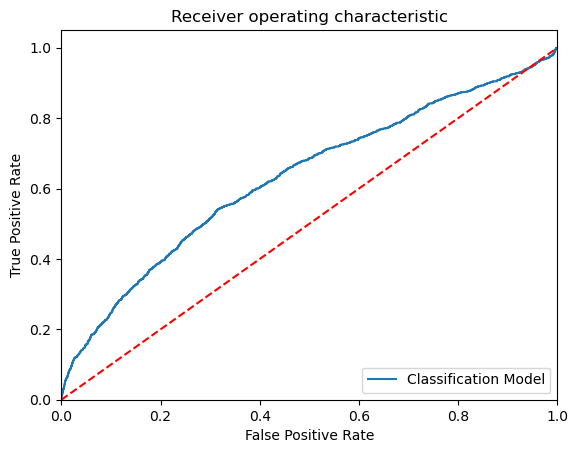

-----------------------------------------------------------------------------------------------------


In [38]:
# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data 

ModelSVM1 = ModelSVM1.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults= EMResults.append(new_row, ignore_index=True)
#-------------------------------------------------------------------------------------------------------------

# SVM POLYNOMIAL KERNAL ALGORITHM

Model Name:  SVM - Polynominal
Confusion matrix : 
 [[  102  1231]
 [   44 15066]]
Outcome values : 
 102 1231 44 15066
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.08      0.14      1333
           0       0.92      1.00      0.96     15110

    accuracy                           0.92     16443
   macro avg       0.81      0.54      0.55     16443
weighted avg       0.91      0.92      0.89     16443

Accuracy : 92.2 %
Precision : 69.9 %
Recall : 7.7 %
F1 Score : 0.138
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 53.7 %
MCC : 0.214
roc_auc_score: 0.537


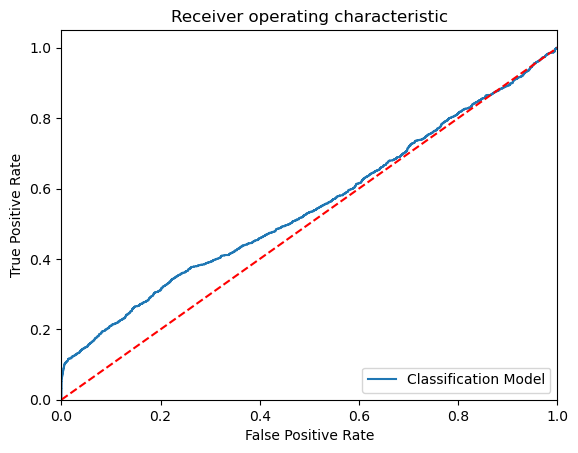

-----------------------------------------------------------------------------------------------------


In [39]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

ModelSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMPoly.predict(x_test)
y_pred_prob = ModelSVMPoly.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Polynominal",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults= EMResults.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------

# SVM GUASSIAN KERNEL ALGORITHM

Model Name:  SVM - Gaussian
Confusion matrix : 
 [[  783   550]
 [ 3492 11618]]
Outcome values : 
 783 550 3492 11618
Classification report : 
               precision    recall  f1-score   support

           1       0.18      0.59      0.28      1333
           0       0.95      0.77      0.85     15110

    accuracy                           0.75     16443
   macro avg       0.57      0.68      0.57     16443
weighted avg       0.89      0.75      0.81     16443

Accuracy : 75.4 %
Precision : 18.3 %
Recall : 58.7 %
F1 Score : 0.279
Specificity or True Negative Rate : 76.9 %
Balanced Accuracy : 67.8 %
MCC : 0.222
roc_auc_score: 0.678


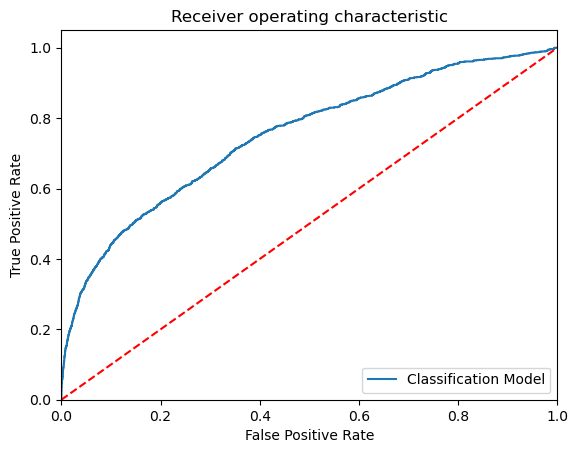

-----------------------------------------------------------------------------------------------------


In [42]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMGaussian.predict(x_test)
y_pred_prob = ModelSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name
    
print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults= EMResults.append(new_row, ignore_index=True)
#---------------------------------------------------------------------------------------------------------------

# SVM SIGMOID KERNAL ALGORITHM

Model Name:  SVM - Sigmoid
Confusion matrix : 
 [[ 549  784]
 [8794 6316]]
Outcome values : 
 549 784 8794 6316
Classification report : 
               precision    recall  f1-score   support

           1       0.06      0.41      0.10      1333
           0       0.89      0.42      0.57     15110

    accuracy                           0.42     16443
   macro avg       0.47      0.41      0.34     16443
weighted avg       0.82      0.42      0.53     16443

Accuracy : 41.8 %
Precision : 5.9 %
Recall : 41.2 %
F1 Score : 0.103
Specificity or True Negative Rate : 41.8 %
Balanced Accuracy : 41.5 %
MCC : -0.094
roc_auc_score: 0.415


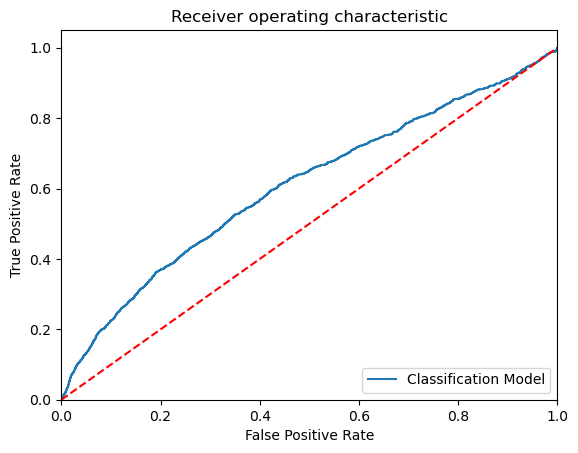

-----------------------------------------------------------------------------------------------------


In [43]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMSig.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMSig.predict(x_test)
y_pred_prob = ModelSVMSig.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Sigmoid")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMSig.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Sigmoid",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults= EMResults.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

In [44]:
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,0,1333,0,15110,0.919,NaN,0.000,0.000,1.000,NaN,0.500000,0.500
1,SVM - Polynominal,102,1231,44,15066,0.922,0.699,0.077,0.138,0.997,0.214,0.536804,0.537
2,SVM - Gaussian,783,550,3492,11618,0.754,0.183,0.587,0.279,0.769,0.222,0.678146,0.678
3,SVM - Gaussian,783,550,3492,11618,0.754,0.183,0.587,0.279,0.769,0.222,0.678146,0.678
4,SVM - Gaussian,783,550,3492,11618,0.754,0.183,0.587,0.279,0.769,0.222,0.678146,0.678


In [45]:
EMResults01=pd.read_csv(r"C:\Users\gowth\Downloads\emp\EMResults01.csv",header=0)
EMResults01

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# COMPARE THE ALGORITHMS

Model Name:  LogisticRegression()
Confusion matrix : 
 [[  102  1231]
 [   37 15073]]
Outcome values : 
 102 1231 37 15073
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.08      0.14      1333
           0       0.92      1.00      0.96     15110

    accuracy                           0.92     16443
   macro avg       0.83      0.54      0.55     16443
weighted avg       0.91      0.92      0.89     16443

Accuracy : 92.3 %
Precision : 73.4 %
Recall : 7.7 %
F1 Score : 0.139
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 53.8 %
MCC : 0.221
roc_auc_score: 0.537


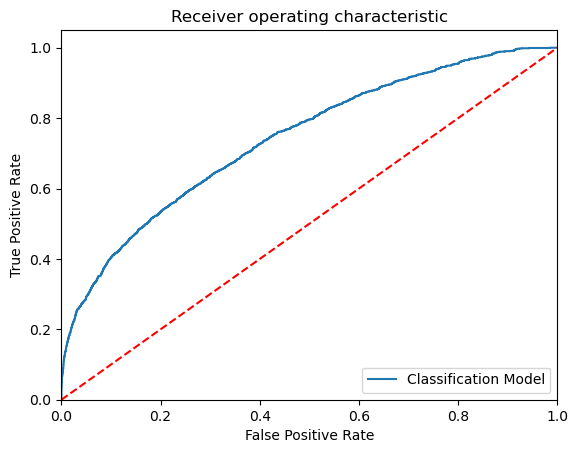

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[  525   808]
 [ 1024 14086]]
Outcome values : 
 525 808 1024 14086
Classification report : 
               precision    recall  f1-score   support

           1       0.34      0.39      0.36      1333
           0       0.95      0.93      0.94     15110

    accuracy                           0.89     16443
   macro avg       0.64      0.66      0.65     16443
weighted avg       0.90      0.89      0.89     16443

Accuracy : 88.9 %
Precision : 33.9 %
Recall : 39.4 %
F1 Score : 0.364
Specificity or True Negative Rate : 93.2 %
Balanced Accuracy : 66.3 %
MCC : 0.305
roc_auc_score: 0.663


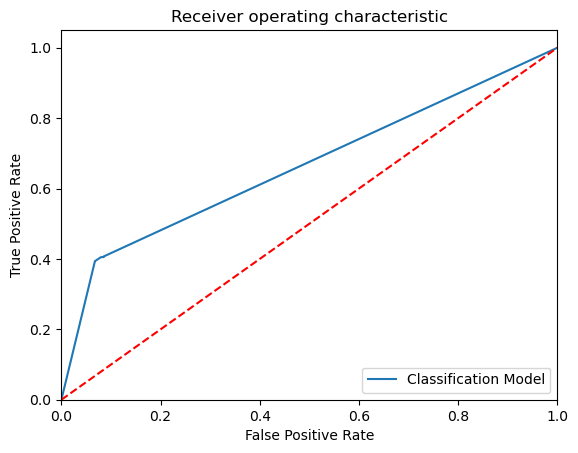

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[  443   890]
 [  236 14874]]
Outcome values : 
 443 890 236 14874
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.33      0.44      1333
           0       0.94      0.98      0.96     15110

    accuracy                           0.93     16443
   macro avg       0.80      0.66      0.70     16443
weighted avg       0.92      0.93      0.92     16443

Accuracy : 93.2 %
Precision : 65.2 %
Recall : 33.2 %
F1 Score : 0.44
Specificity or True Negative Rate : 98.4 %
Balanced Accuracy : 65.8 %
MCC : 0.434
roc_auc_score: 0.658


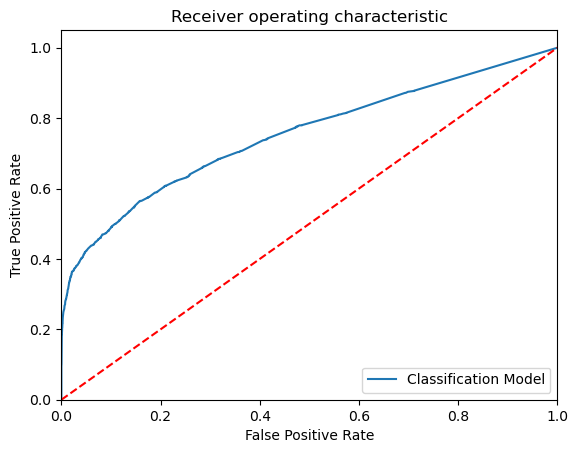

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[  436   897]
 [  311 14799]]
Outcome values : 
 436 897 311 14799
Classification report : 
               precision    recall  f1-score   support

           1       0.58      0.33      0.42      1333
           0       0.94      0.98      0.96     15110

    accuracy                           0.93     16443
   macro avg       0.76      0.65      0.69     16443
weighted avg       0.91      0.93      0.92     16443

Accuracy : 92.7 %
Precision : 58.4 %
Recall : 32.7 %
F1 Score : 0.419
Specificity or True Negative Rate : 97.9 %
Balanced Accuracy : 65.3 %
MCC : 0.402
roc_auc_score: 0.653


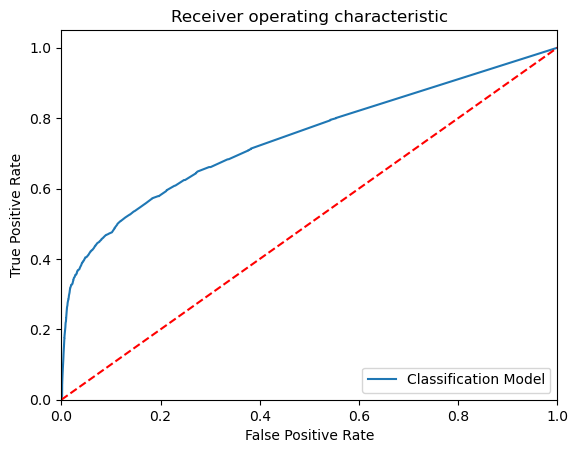

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[  272  1061]
 [   46 15064]]
Outcome values : 
 272 1061 46 15064
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.20      0.33      1333
           0       0.93      1.00      0.96     15110

    accuracy                           0.93     16443
   macro avg       0.89      0.60      0.65     16443
weighted avg       0.93      0.93      0.91     16443

Accuracy : 93.3 %
Precision : 85.5 %
Recall : 20.4 %
F1 Score : 0.329
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 60.0 %
MCC : 0.398
roc_auc_score: 0.601


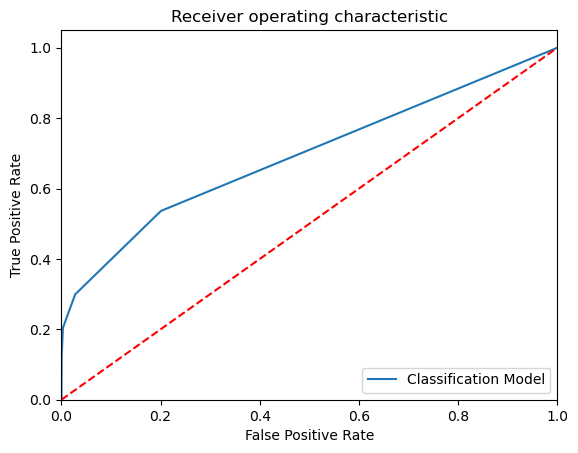

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', kernel='poly', probability=True, random_state=42)
Confusion matrix : 
 [[  766   567]
 [ 3233 11877]]
Outcome values : 
 766 567 3233 11877
Classification report : 
               precision    recall  f1-score   support

           1       0.19      0.57      0.29      1333
           0       0.95      0.79      0.86     15110

    accuracy                           0.77     16443
   macro avg       0.57      0.68      0.57     16443
weighted avg       0.89      0.77      0.82     16443

Accuracy : 76.9 %
Precision : 19.2 %
Recall : 57.5 %
F1 Score : 0.287
Specificity or True Negative Rate : 78.6 %
Balanced Accuracy : 68.0 %
MCC : 0.229
roc_auc_score: 0.68


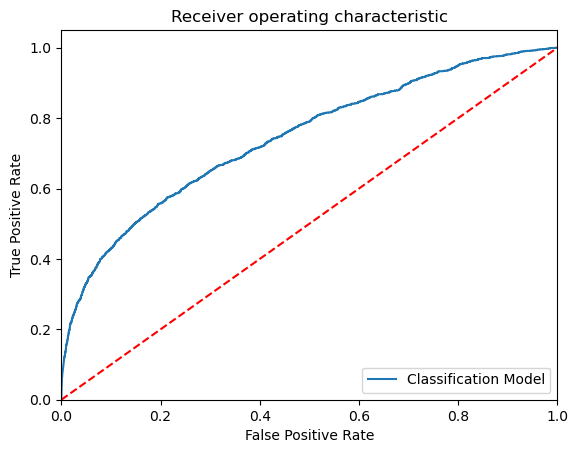

-----------------------------------------------------------------------------------------------------


In [46]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=4)
ModelSVM = SVC(kernel='poly', random_state = 42, class_weight='balanced', probability=True)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM]

for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #---
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults01 = EMResults01.append(new_row, ignore_index=True)
    #------------------------------------------------------------------------------------------------------------------

In [47]:
EMResults01

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),102,1231,37,15073,0.923,0.734,0.077,0.139,0.998,0.221,0.537035,0.538
1,DecisionTreeClassifier(),525,808,1024,14086,0.889,0.339,0.394,0.364,0.932,0.305,0.663039,0.663
2,"(DecisionTreeClassifier(max_features='sqrt', r...",443,890,236,14874,0.932,0.652,0.332,0.440,0.984,0.434,0.658357,0.658
3,"(ExtraTreeClassifier(random_state=1725542164),...",436,897,311,14799,0.927,0.584,0.327,0.419,0.979,0.402,0.653250,0.653
4,KNeighborsClassifier(n_neighbors=4),272,1061,46,15064,0.933,0.855,0.204,0.329,0.997,0.398,0.600503,0.600
5,"SVC(class_weight='balanced', kernel='poly', pr...",766,567,3233,11877,0.769,0.192,0.575,0.287,0.786,0.229,0.680340,0.680


In [48]:
y_predDC=ModelDC.predict(Empdata1)
y_predDC=pd.DataFrame(y_predDC)

In [49]:
#create new dataframe with actual vs predicted values
#Results=pd.DataFrame({'is_promoted_A':y_test,'is_promoted_P':y_predDC})
#merge the two dataframes on index of both data frames
ResultsFinal = Empdata1.merge(y_predDC,left_index=True,right_index=True)

# Display 10 records randomly

ResultsFinal.sample(10)

,department,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,0
18012,2,0,0,1,26,5.0,5,0,55,1
11272,2,0,0,1,29,4.0,2,0,50,1
957,1,0,2,2,35,4.0,7,0,60,1
1669,7,0,0,2,44,1.0,5,0,48,1
17129,5,2,0,1,34,2.0,7,0,72,1
22362,7,0,0,1,59,5.0,16,0,50,1
4694,1,0,0,2,33,5.0,7,0,63,1
10111,4,0,0,1,33,1.0,6,0,61,1
14220,5,0,0,1,30,3.0,6,0,70,1
16364,7,2,2,1,55,3.0,18,0,52,1


In [50]:
ResultsFinal=ResultsFinal.rename(columns={0:'is_promoted'},inplace=False)
ResultsFinal

,department,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,8,0,2,1,24,3.339146,1,0,77,1
1,2,0,0,1,31,3.000000,5,0,51,1
2,7,0,0,1,31,1.000000,4,0,47,1
3,5,0,0,3,31,2.000000,9,0,65,1
4,1,0,2,1,30,4.000000,7,0,61,1
...,...,...,...,...,...,...,...,...,...,...
23485,3,1,2,1,24,3.000000,1,0,61,1
23486,8,0,2,1,31,3.000000,7,0,74,1
23487,2,0,2,1,26,4.000000,4,0,50,1
23488,5,0,2,3,27,3.339146,1,0,70,1


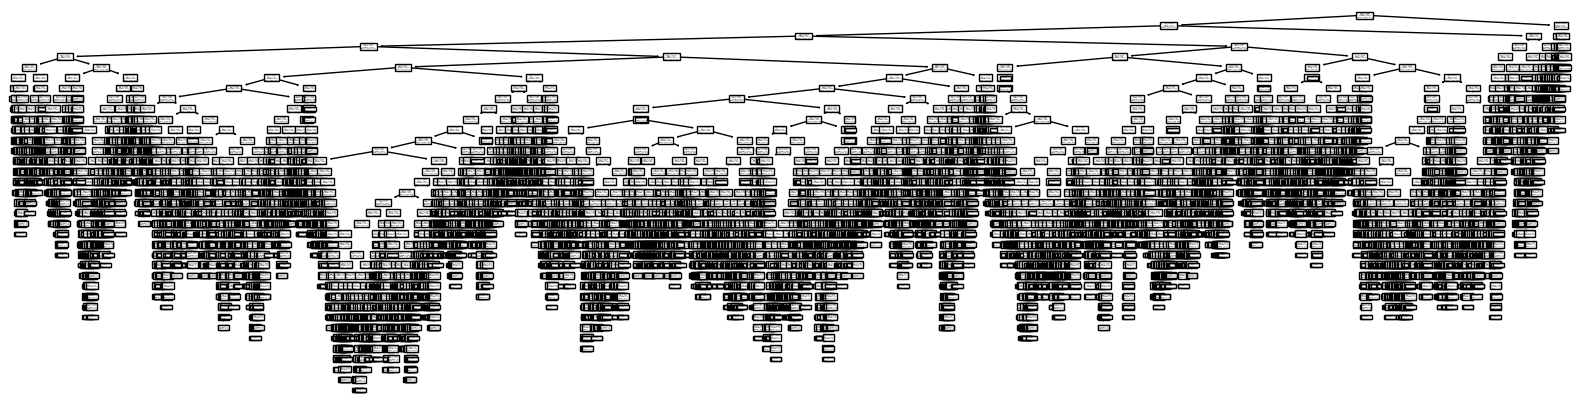

In [52]:
#PLOT THE DECISION TREE
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,5))
tree.plot_tree(ModelDC);